In [5]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [2]:
away = pd.read_csv('train_merged_away.csv')
home = pd.read_csv('train_merged_home.csv')
result = pd.read_csv('Y_train_1rknArQ.csv')
test_home = pd.read_csv('test_merged_home.csv')
test_away = pd.read_csv('test_merged_away.csv')
test_result = pd.read_csv('Y_test_random_sEE2QeA.csv')

In [3]:
# deciding the attributes used in the tree in deciding 
features = ['PLAYER_ACCURATE_CROSSES_season_sum_P1', 'PLAYER_ACCURATE_CROSSES_season_sum_P2', 'PLAYER_ACCURATE_CROSSES_season_sum_P3', 'PLAYER_ACCURATE_CROSSES_season_sum_P4', 'PLAYER_ACCURATE_CROSSES_season_sum_P5', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P1', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P3', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P4', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P5', 'PLAYER_ACCURATE_PASSES_season_sum_P1', 'PLAYER_ACCURATE_PASSES_season_sum_P2', 'PLAYER_ACCURATE_PASSES_season_sum_P3', 'PLAYER_ACCURATE_PASSES_season_sum_P4', 'PLAYER_ACCURATE_PASSES_season_sum_P5', 'PLAYER_AERIALS_WON_season_sum_P1', 'PLAYER_AERIALS_WON_season_sum_P2', 'PLAYER_AERIALS_WON_season_sum_P3', 'PLAYER_AERIALS_WON_season_sum_P4', 'PLAYER_AERIALS_WON_season_sum_P5', 'PLAYER_ASSISTS_season_sum_P1', 'PLAYER_ASSISTS_season_sum_P5', 'PLAYER_BIG_CHANCES_CREATED_season_sum_P5', 'PLAYER_GOALS_CONCEDED_5_last_match_average_P1', 'PLAYER_GOALS_CONCEDED_5_last_match_average_P2', 'PLAYER_GOALS_CONCEDED_5_last_match_average_P3', 'PLAYER_GOALS_CONCEDED_5_last_match_average_P4', 'PLAYER_GOALS_CONCEDED_5_last_match_average_P5', 'PLAYER_GOALS_CONCEDED_season_sum_P1', 'PLAYER_GOALS_CONCEDED_season_sum_P2', 'PLAYER_GOALS_CONCEDED_season_sum_P3', 'PLAYER_GOALS_CONCEDED_season_sum_P4', 'PLAYER_GOALS_CONCEDED_season_sum_P5', 'PLAYER_KEY_PASSES_5_last_match_average_P5', 'PLAYER_KEY_PASSES_season_sum_P1', 'PLAYER_KEY_PASSES_season_sum_P5', 'PLAYER_LONG_BALLS_WON_5_last_match_average_P3', 'PLAYER_LONG_BALLS_WON_5_last_match_average_P4', 'PLAYER_LONG_BALLS_WON_5_last_match_average_P5', 'PLAYER_MINUTES_PLAYED_5_last_match_average_P2', 'PLAYER_MINUTES_PLAYED_5_last_match_average_P3', 'PLAYER_MINUTES_PLAYED_5_last_match_average_P4', 'PLAYER_MINUTES_PLAYED_5_last_match_average_P5', 'PLAYER_MINUTES_PLAYED_season_sum_P1', 'PLAYER_MINUTES_PLAYED_season_sum_P2', 'PLAYER_MINUTES_PLAYED_season_sum_P3', 'PLAYER_MINUTES_PLAYED_season_sum_P4', 'PLAYER_MINUTES_PLAYED_season_sum_P5', 'PLAYER_PASSES_5_last_match_average_P3', 'PLAYER_PASSES_season_sum_P3', 'PLAYER_PENALTIES_MISSES_5_last_match_average_P1', 'PLAYER_PENALTIES_MISSES_5_last_match_average_P2', 'PLAYER_PENALTIES_MISSES_5_last_match_average_P3', 'PLAYER_PENALTIES_MISSES_5_last_match_average_P4', 'PLAYER_PENALTIES_MISSES_5_last_match_average_P5', 'PLAYER_PENALTIES_SAVED_5_last_match_average_P1', 'PLAYER_PENALTIES_SAVED_5_last_match_average_P2', 'PLAYER_PENALTIES_SAVED_5_last_match_average_P3', 'PLAYER_PENALTIES_SAVED_5_last_match_average_P4', 'PLAYER_PENALTIES_SAVED_5_last_match_average_P5', 'PLAYER_PENALTIES_SCORED_5_last_match_average_P1', 'PLAYER_PENALTIES_SCORED_5_last_match_average_P2', 'PLAYER_PENALTIES_SCORED_5_last_match_average_P3', 'PLAYER_PENALTIES_SCORED_5_last_match_average_P4', 'PLAYER_PENALTIES_SCORED_5_last_match_average_P5', 'PLAYER_PENALTIES_WON_5_last_match_average_P1', 'PLAYER_PENALTIES_WON_5_last_match_average_P2', 'PLAYER_PENALTIES_WON_5_last_match_average_P3', 'PLAYER_PENALTIES_WON_5_last_match_average_P4', 'PLAYER_PENALTIES_WON_5_last_match_average_P5', 'PLAYER_RATING_5_last_match_average_P1', 'PLAYER_RATING_5_last_match_average_P2', 'PLAYER_RATING_5_last_match_average_P3', 'PLAYER_RATING_5_last_match_average_P4', 'PLAYER_REDCARDS_5_last_match_average_P5', 'PLAYER_SAVES_5_last_match_average_P1', 'PLAYER_SAVES_5_last_match_average_P2', 'PLAYER_SAVES_5_last_match_average_P3', 'PLAYER_SAVES_5_last_match_average_P4', 'PLAYER_SAVES_5_last_match_average_P5', 'PLAYER_SAVES_INSIDE_BOX_5_last_match_average_P1', 'PLAYER_SAVES_INSIDE_BOX_5_last_match_average_P2', 'PLAYER_SAVES_INSIDE_BOX_5_last_match_average_P3', 'PLAYER_SAVES_INSIDE_BOX_5_last_match_average_P4', 'PLAYER_SAVES_INSIDE_BOX_5_last_match_average_P5', 'PLAYER_SHOTS_BLOCKED_5_last_match_average_P1', 'PLAYER_SHOTS_BLOCKED_5_last_match_average_P2', 'PLAYER_SHOTS_BLOCKED_5_last_match_average_P3', 'PLAYER_SHOTS_BLOCKED_5_last_match_average_P4', 'PLAYER_SHOTS_BLOCKED_5_last_match_average_P5', 'PLAYER_SHOTS_OFF_TARGET_5_last_match_average_P1', 'PLAYER_SHOTS_OFF_TARGET_5_last_match_average_P2', 'PLAYER_SHOTS_OFF_TARGET_5_last_match_average_P3', 'PLAYER_SHOTS_OFF_TARGET_5_last_match_average_P4', 'PLAYER_SHOTS_OFF_TARGET_5_last_match_average_P5', 'PLAYER_SHOTS_ON_TARGET_5_last_match_average_P1', 'PLAYER_SHOTS_ON_TARGET_5_last_match_average_P2', 'PLAYER_SHOTS_ON_TARGET_5_last_match_average_P3', 'PLAYER_SHOTS_ON_TARGET_5_last_match_average_P4', 'PLAYER_SHOTS_ON_TARGET_5_last_match_average_P5', 'PLAYER_SHOTS_TOTAL_5_last_match_average_P1', 'PLAYER_SHOTS_TOTAL_5_last_match_average_P2', 'PLAYER_SHOTS_TOTAL_5_last_match_average_P3', 'PLAYER_SHOTS_TOTAL_5_last_match_average_P4', 'PLAYER_SHOTS_TOTAL_5_last_match_average_P5', 'PLAYER_STARTING_LINEUP_5_last_match_average_P1', 'PLAYER_STARTING_LINEUP_5_last_match_average_P2', 'PLAYER_STARTING_LINEUP_5_last_match_average_P3', 'PLAYER_STARTING_LINEUP_5_last_match_average_P4', 'PLAYER_STARTING_LINEUP_5_last_match_average_P5', 'PLAYER_STARTING_LINEUP_season_sum_P1', 'PLAYER_STARTING_LINEUP_season_sum_P2', 'PLAYER_STARTING_LINEUP_season_sum_P3', 'PLAYER_STARTING_LINEUP_season_sum_P4', 'PLAYER_STARTING_LINEUP_season_sum_P5', 'PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_average_P1', 'PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_average_P2', 'PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_average_P3', 'PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_average_P4', 'PLAYER_YELLOWCARDS_season_sum_P4', 'PLAYER_YELLOWCARDS_season_sum_P5', 'TEAM_ATTACKS_5_last_match_average', 'TEAM_ATTACKS_season_sum', 'TEAM_BALL_POSSESSION_5_last_match_average', 'TEAM_BALL_SAFE_5_last_match_average', 'TEAM_BALL_SAFE_season_sum', 'TEAM_CORNERS_5_last_match_average', 'TEAM_CORNERS_season_sum', 'TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'TEAM_DANGEROUS_ATTACKS_season_sum', 'TEAM_FOULS_5_last_match_average', 'TEAM_GAME_DRAW_5_last_match_average', 'TEAM_GAME_DRAW_season_sum', 'TEAM_GAME_LOST_5_last_match_average', 'TEAM_GAME_LOST_season_sum', 'TEAM_GAME_WON_5_last_match_average', 'TEAM_GAME_WON_season_sum', 'TEAM_GOALS_5_last_match_average', 'TEAM_GOALS_season_sum', 'TEAM_INJURIES_5_last_match_average', 'TEAM_OFFSIDES_5_last_match_average', 'TEAM_OFFSIDES_season_sum', 'TEAM_PASSES_5_last_match_average', 'TEAM_PASSES_season_sum', 'TEAM_PENALTIES_5_last_match_average', 'TEAM_PENALTIES_season_sum', 'TEAM_REDCARDS_5_last_match_average', 'TEAM_SAVES_5_last_match_average', 'TEAM_SAVES_season_sum', 'TEAM_SHOTS_INSIDEBOX_5_last_match_average', 'TEAM_SHOTS_INSIDEBOX_season_sum', 'TEAM_SHOTS_OFF_TARGET_5_last_match_average', 'TEAM_SHOTS_OFF_TARGET_season_sum', 'TEAM_SHOTS_ON_TARGET_5_last_match_average', 'TEAM_SHOTS_ON_TARGET_season_sum', 'TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'TEAM_SHOTS_OUTSIDEBOX_season_sum', 'TEAM_SHOTS_TOTAL_5_last_match_average', 'TEAM_SHOTS_TOTAL_season_sum', 'TEAM_SUBSTITUTIONS_5_last_match_average', 'TEAM_SUCCESSFUL_PASSES_5_last_match_average', 'TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'TEAM_SUCCESSFUL_PASSES_season_sum', 'TEAM_YELLOWCARDS_5_last_match_average', 'TEAM_YELLOWCARDS_season_sum']
result_feature = ['AWAY_WINS']

In [7]:
X_train = away[features]
X_test = test_away[features]
y_train = result['AWAY_WINS']
y_test = test_result['AWAY_WINS']

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=42, criterion='entropy')
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)

In [33]:
report = classification_report(y_pred, y_test, output_dict=True)
print(report)
print(confusion_matrix(y_pred, y_test))

{'0': {'precision': 0.9789935912651317, 'recall': 0.6644114212073617, 'f1-score': 0.7915936952714536, 'support': 24831.0}, '1': {'precision': 0.021488961953969, 'recall': 0.3407821229050279, 'f1-score': 0.04042858720866011, 'support': 537.0}, 'accuracy': 0.657560706401766, 'macro avg': {'precision': 0.5002412766095504, 'recall': 0.5025967720561948, 'f1-score': 0.4160111412400569, 'support': 25368.0}, 'weighted avg': {'precision': 0.9587247491829772, 'recall': 0.657560706401766, 'f1-score': 0.7756927309451481, 'support': 25368.0}}
[[16498  8333]
 [  354   183]]


In [76]:
# predicting home wins
f1_home = []
accuracy_home = []
feature = []
y_train = result['HOME_WINS']
y_test = test_result['HOME_WINS']
for index, column in zip(range(50), features): 
    feature.append(column)
    X_train = away[feature]
    X_test = test_away[feature]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    report = classification_report(y_pred, y_test, output_dict=True)
    f1_home.append(report['1']['f1-score'])
    accuracy_home.append(report['accuracy'])

In [77]:
# predicting away wins
f1_away = []
accuracy_away = []
feature = []
y_train = result['AWAY_WINS']
y_test = test_result['AWAY_WINS']
for index, column in zip(range(50), features): 
    feature.append(column)
    X_train = home[feature]
    X_test = test_home[feature]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    report = classification_report(y_pred, y_test, output_dict=True)
    f1_away.append(report['1']['f1-score'])
    accuracy_away.append(report['accuracy'])

In [92]:
length = []
for i in range(10, 50): 
    length.append(i)

In [85]:
print(confusion_matrix(y_pred, y_test))

[[16494  8327]
 [  358   189]]


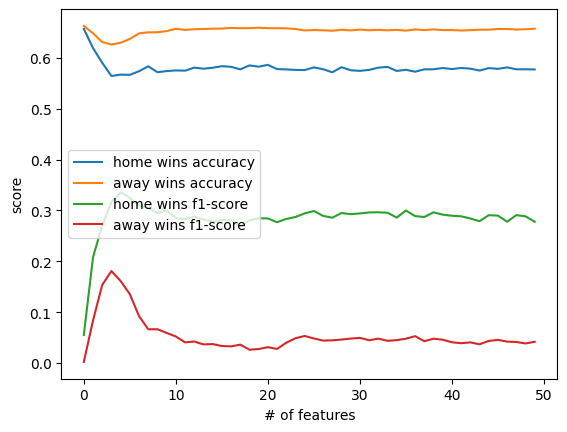

In [86]:
plt.plot(length, accuracy_home, label='home wins accuracy')
plt.plot(length, accuracy_away, label='away wins accuracy')
plt.plot(length, f1_home, label='home wins f1-score')
plt.plot(length, f1_away, label = 'away wins f1-score')
plt.xlabel('# of features')
plt.ylabel('score')
plt.legend()
plt.savefig('graph.pdf')
plt.show()

In [87]:
# explore max depth
#feature = ['PLAYER_ACCURATE_CROSSES_season_sum_P1', 'PLAYER_ACCURATE_CROSSES_season_sum_P2', 'PLAYER_ACCURATE_CROSSES_season_sum_P3', 'PLAYER_ACCURATE_CROSSES_season_sum_P4', 'PLAYER_ACCURATE_CROSSES_season_sum_P5', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P1', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P3', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P4', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P5', 'PLAYER_ACCURATE_PASSES_season_sum_P1',]
feature = ['PLAYER_ACCURATE_CROSSES_season_sum_P1', 'PLAYER_ACCURATE_CROSSES_season_sum_P2', 'PLAYER_ACCURATE_CROSSES_season_sum_P3', 'PLAYER_ACCURATE_CROSSES_season_sum_P4', 'PLAYER_ACCURATE_CROSSES_season_sum_P5']
f1_home = []
accuracy_home = []
y_train = result['HOME_WINS']
y_test = test_result['HOME_WINS']
for i in range(10, 50): 
    classifier = RandomForestClassifier(n_estimators=50, random_state=42, criterion='entropy', max_depth=i)
    X_train = away[feature]
    X_test = test_away[feature]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    report = classification_report(y_pred, y_test, output_dict=True)
    f1_home.append(report['1']['f1-score'])
    accuracy_home.append(report['accuracy'])

In [88]:
f1_away = []
accuracy_away = []
#feature = ['PLAYER_ACCURATE_CROSSES_season_sum_P1', 'PLAYER_ACCURATE_CROSSES_season_sum_P2', 'PLAYER_ACCURATE_CROSSES_season_sum_P3', 'PLAYER_ACCURATE_CROSSES_season_sum_P4', 'PLAYER_ACCURATE_CROSSES_season_sum_P5', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P1', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P3', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P4', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P5', 'PLAYER_ACCURATE_PASSES_season_sum_P1',]
y_train = result['AWAY_WINS']
y_test = test_result['AWAY_WINS']
for i in range(10,50): 
    classifier = RandomForestClassifier(n_estimators=50, random_state=42, criterion='entropy', max_depth=i)
    X_train = home[feature]
    X_test = test_home[feature]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    report = classification_report(y_pred, y_test, output_dict=True)
    f1_away.append(report['1']['f1-score'])
    accuracy_away.append(report['accuracy'])

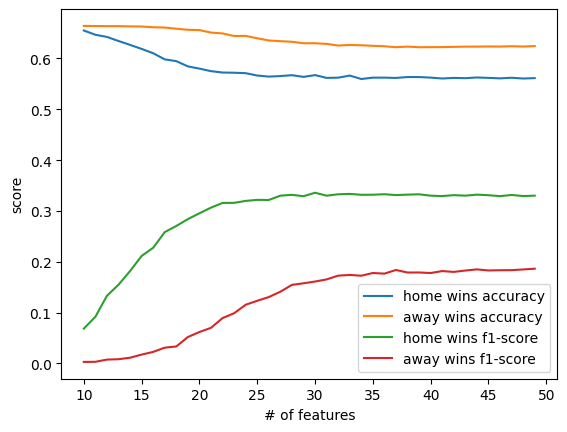

In [95]:
plt.plot(length, accuracy_home, label='home wins accuracy')
plt.plot(length, accuracy_away, label='away wins accuracy')
plt.plot(length, f1_home, label='home wins f1-score')
plt.plot(length, f1_away, label = 'away wins f1-score')
plt.xlabel('# of features')
plt.ylabel('score')
plt.legend()
plt.savefig('graph.pdf')
plt.show()

In [69]:
print(confusion_matrix(y_pred, y_test))

[[14645  7453]
 [ 2207  1063]]


In [75]:
# 5 features and 30 max depth
#feature = ['PLAYER_ACCURATE_CROSSES_season_sum_P1', 'PLAYER_ACCURATE_CROSSES_season_sum_P2', 'PLAYER_ACCURATE_CROSSES_season_sum_P3', 'PLAYER_ACCURATE_CROSSES_season_sum_P4', 'PLAYER_ACCURATE_CROSSES_season_sum_P5', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P1', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P3', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P4', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P5', 'PLAYER_ACCURATE_PASSES_season_sum_P1',]
feature = ['PLAYER_ACCURATE_CROSSES_season_sum_P1', 'PLAYER_ACCURATE_CROSSES_season_sum_P2', 'PLAYER_ACCURATE_CROSSES_season_sum_P3', 'PLAYER_ACCURATE_CROSSES_season_sum_P4', 'PLAYER_ACCURATE_CROSSES_season_sum_P5']
classifier = RandomForestClassifier(n_estimators=50, random_state=42, criterion='entropy', max_depth=30)
X_train = away[feature]
X_test = test_away[feature]
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
report = classification_report(y_pred, y_test, output_dict=True)
print(report['1']['f1-score'])
print(report['accuracy'])
print(confusion_matrix(y_pred, y_test))

0.17710212144636261
0.6223194575843582
[[14756  7485]
 [ 2096  1031]]


In [94]:
classifier = RandomForestClassifier(n_estimators=50, random_state=42, criterion='entropy', max_depth=30)
X_train = home[feature]
X_test = test_home[feature]
y_train = result['HOME_WINS']
y_test = test_result['HOME_WINS']
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
report = classification_report(y_pred, y_test, output_dict=True)
print(report['1']['f1-score'])
print(report['accuracy'])
print(confusion_matrix(y_pred, y_test))

0.32844999095677335
0.5609035004730369
[[11505  5693]
 [ 5446  2724]]
